
## **CLINT TERM SUBSCRIPTION PROJECT**

## **1.0 Business Understanding** ##

*The financial sector often relies on targeted marketing strategies to drive customer engagement and maximize returns.* *In this context, direct marketing campaigns play a pivotal role in promoting financial products like term deposits.* *This project leverages data from direct phone call marketing campaigns conducted by a banking institution to predict client subscription to term deposits.* *The dataset includes various demographic, financial, and campaign-specific attributes of clients, along with the final outcome indicating whether a term deposit was subscribed (yes) or not (no).*

*Using machine learning, this project aims to build a predictive model that will empower the bank's marketing team to identify potential clients more effectively, reduce campaign costs, and optimize resource allocation by focusing on the most promising leads*

## **Objective** ##

*The primary objective of this project is to develop a classification model using machine learning to predict whether a client will subscribe to a term deposit (y = yes) or not (y = no) based on the features provided in the dataset. This model will support the marketing team in improving campaign effectiveness by enabling targeted outreach to clients with a higher likelihood of subscription*

## **Business Questions** ##

*1. Which demographic factors (e.g., age, job, marital status, education) most influence the likelihood of subscribing to a term deposit?*

*2. How does prior engagement with the bank (e.g., previous campaigns or contact history) impact a client’s decision to subscribe?*

*3. What is the effect of financial indicators (e.g., balance, loan status, housing loan status) on subscription likelihood?*

*4. Are there specific time-related patterns (e.g., month or day of contact) that correlate with successful subscriptions?*

*5. Can the model help identify high-value clients, enabling the marketing team to prioritize resources effectively?*

## **Hypothesis** ##

**Null Hypothesis (H₀):**

*There is no statistically significant relationship between the features provided (e.g., demographic, financial, and campaign-specific attributes) and the likelihood of a client subscribing to a term deposit.*

**Alternate Hypothesis (H₁):**

*There is a statistically significant relationship between the features provided (e.g., demographic, financial, and campaign-specific attributes) and the likelihood of a client subscribing to a term deposit.*

## **2.0 Data Understanding** ##

**2.1: Installing and Importing  Packages**



In [1]:
# Installing the required libraries for the notebook to accomodate the codes
# pip install pyodbc  
# pip install python-dotenv 
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install pandas
# pip install currency_converter
# pip install forex-python
# pip install scipy
# pip install forex-python
# pip install statsmodels
# imbalanced-learn          0.11.0

**2.1.1: Importing the required Libraries to work with**

In [2]:
# Importing the needed libraries 
# pandas to clean and manipulate the data
# numpy for basic calculation
# seaborn and matplolib for visualition 

# Data manipulation packages
import pandas as pd
import numpy as np

#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from joblib import dump


# Machine learning Packages
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline


#Statistical analysis
from sklearn.impute import SimpleImputer
# from forex_python.converter import CurrencyRates
import re
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore") 

## **2.0 Dataset Understanding** ##

**From the information:**

**bank-full.csv:** *Main dataset with 45,211 examples and 17 attributes (16 input variables + 1 target variable). Use this dataset for full-scale analysis and modeling.*

**bank.csv:** *A 10% subset (4,521 examples) for computationally expensive models or quick testing.*

## **Key Observations:** ##

**No missing values are present.**

**Target variable (y) is binary: "yes" or "no" (classification problem).**

**Contains a mix of:**

**Numerical variables: age, balance, duration, campaign, pdays, previous.**

**Categorical variables: job, marital, education, etc.**

**Binary variables: default, housing, loan**

## **2.1 Initial Analysis** ##

*Perform a detailed overview of the dataset:*

**1. Load the Dataset**

In [3]:
# Loading the 'bank-full.csv'
file_path = r'C:\Users\user\OneDrive\Desktop\MY DS CAREER ACCELERATOR\Client-Term-Subscription-Project\data\bank-full.csv'

# Load the dataset into a DataFrame
bank_full = pd.read_csv(file_path, delimiter=';')

**2. Check Dataset Structure:**

In [4]:
# Display the first few rows:
bank_full.head(4)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [5]:
# Inspect data types and check for missing values
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Review basic statistics for numerical variables
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Key Insights for Modeling** 

*Balance and duration exhibit significant variability, which may be important predictors for subscription likelihood.*
*Pdays and previous indicate that most clients are new to campaigns, but understanding the role of repeat engagement could be valuable.*
*Variability in campaign calls and extremely high maximum values could reflect inefficiencies in targeting strategies*

**3. Target Variable Distribution:**

*This will help assess if techniques like resampling are needed*

In [7]:
# Evaluate class balance for y (target)
print(bank_full['y'].value_counts(normalize=True))


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


**Observation**

*The class distribution of the target variable y reveals significant class imbalance:*

*No (Not Subscribed): 88.30% of the data.*

*Yes (Subscribed): 11.70% of the data.*

**4. Explore Unique Values**

In [8]:
# For categorical variables
for col in ['job', 'marital', 'education', 'contact', 'poutcome']:
    print(f"Unique values in {col}: {bank_full[col].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in contact: ['unknown' 'cellular' 'telephone']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']


**5. Check for Duplicates**

In [9]:
print(bank_full.duplicated().sum())


0


## **3.0 Exploratory Data Analysis (EDA)** ##

*Focus on understanding feature distributions, relationships, and potential data preprocessing needs.*

**3.1 Univariate Analysis**

*Examine the distribution of numerical variables*

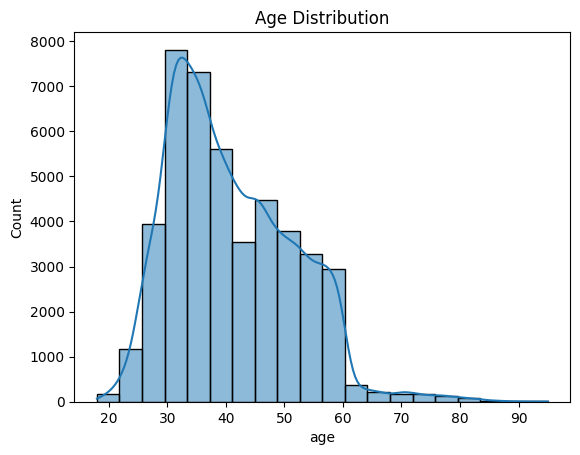

In [10]:
sns.histplot(bank_full['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


In [11]:
# # List of numerical columns to visualize
# numerical_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# for column in numerical_columns:
#     # Histogram
#     sns.histplot(bank_full[column], bins=20, kde=True)
#     plt.title(f"{column.capitalize()} Distribution")
#     plt.xlabel(column.capitalize())
#     plt.ylabel("Frequency")
#     plt.show()
    
#     # Boxplot
#     sns.boxplot(x=bank_full[column])
#     plt.title(f"{column.capitalize()} Boxplot")
#     plt.xlabel(column.capitalize())
#     plt.show()


*Analyze categorical variables using bar plots:*

In [12]:
# # List  of categorical columns
# categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
#                        'loan', 'contact', 'month', 'poutcome', 'y']

# # Visualize the distributions
# for column in categorical_columns:
#     sns.countplot(data=bank_full, x=column, order=bank_full[column].value_counts().index)
#     plt.title(f"{column.capitalize()} Distribution")
#     plt.xlabel(column.capitalize())
#     plt.ylabel("Count")
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
#     plt.show()


**3.2 Bivariate Analysis**

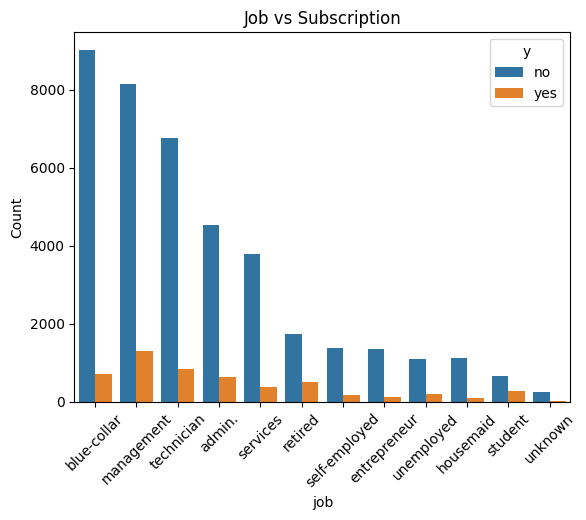

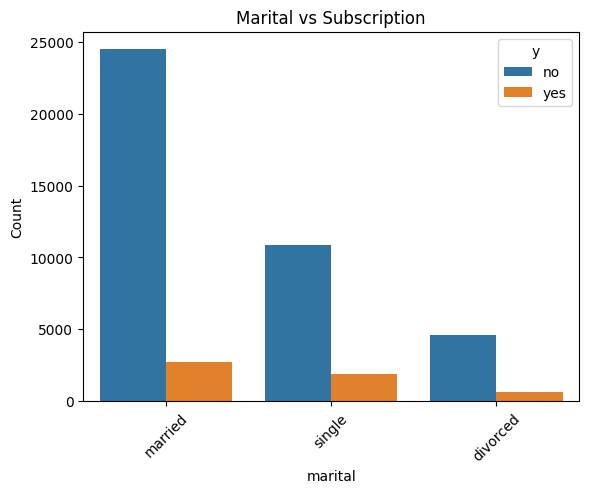

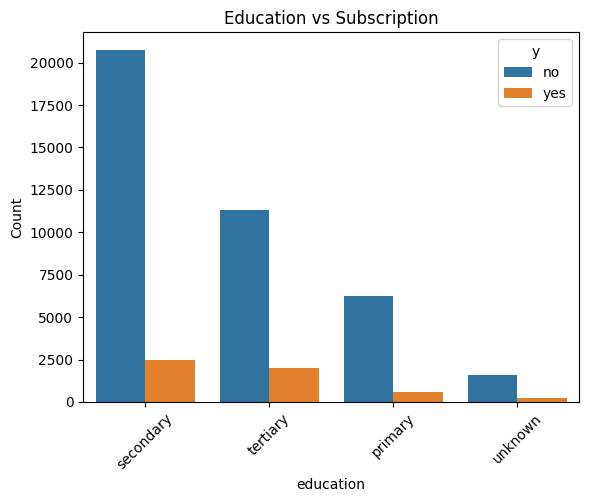

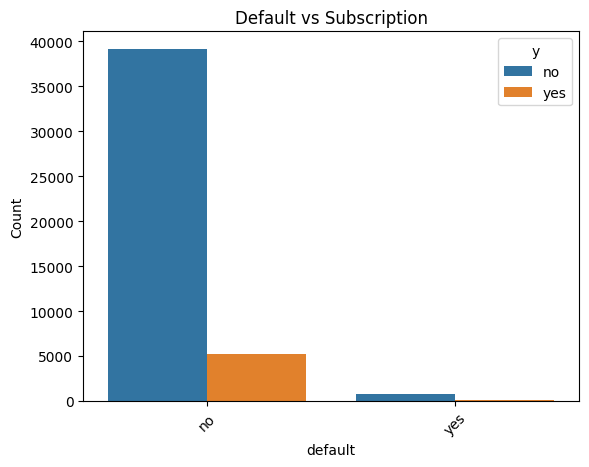

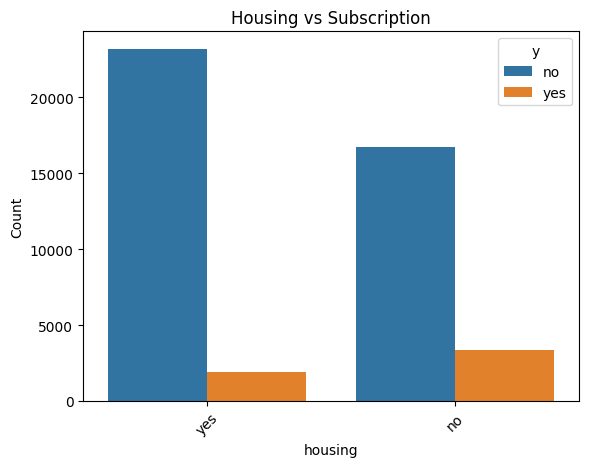

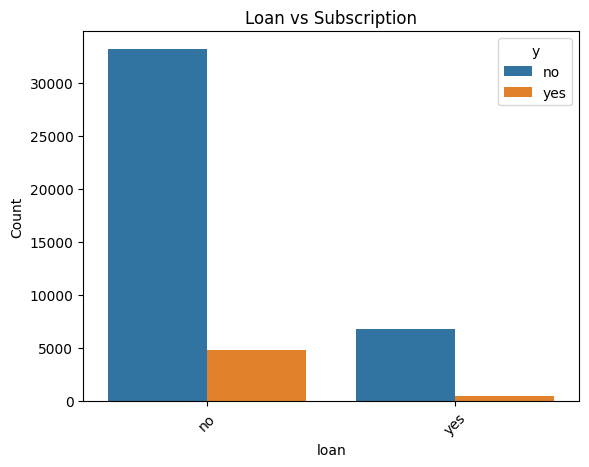

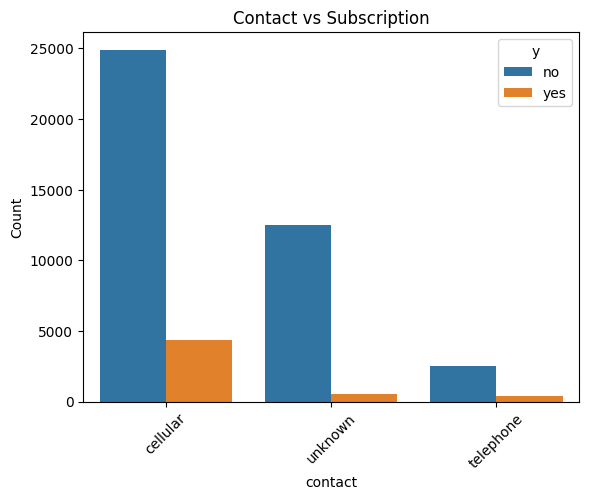

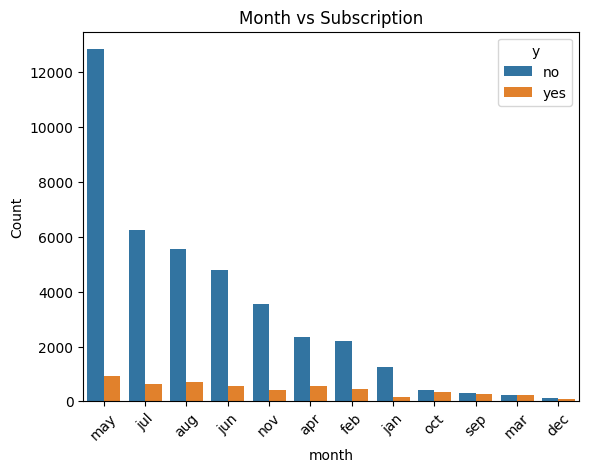

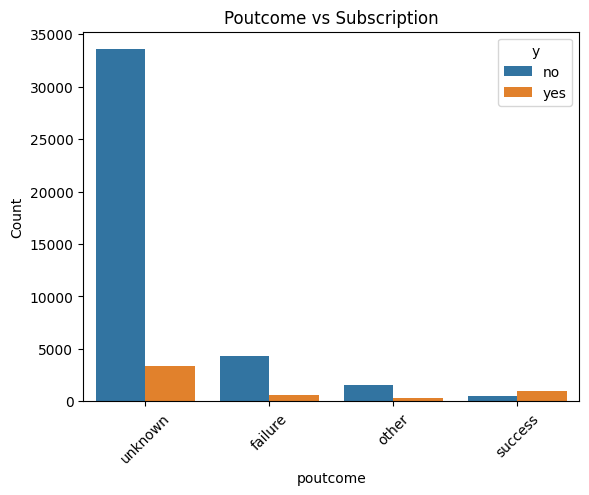

In [13]:
# List of categorical variables excluding the target variable
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome']

# Loop through each categorical variable and plot
for column in categorical_columns:
    sns.countplot(x=column, hue='y', data=bank_full, order=bank_full[column].value_counts().index)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.title(f"{column.capitalize()} vs Subscription")
    plt.ylabel("Count")
    plt.show()


**3.3 Correlation Analysis**

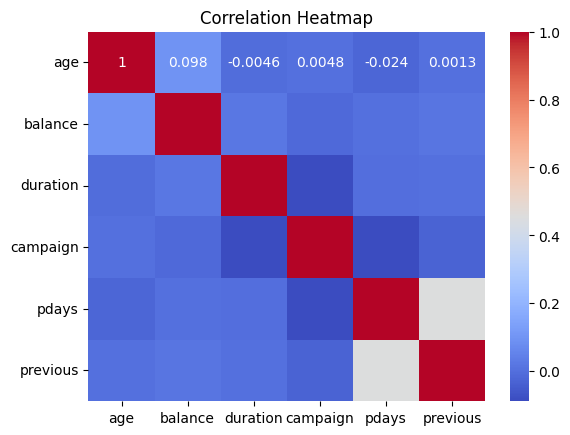

In [14]:
# Correlation for numerical variables:
corr = bank_full[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## **4.0: Answering Business questions** ##

**1. Which demographic factors (e.g., age, job, marital status, education) most influence the likelihood of subscribing to a term deposit?**

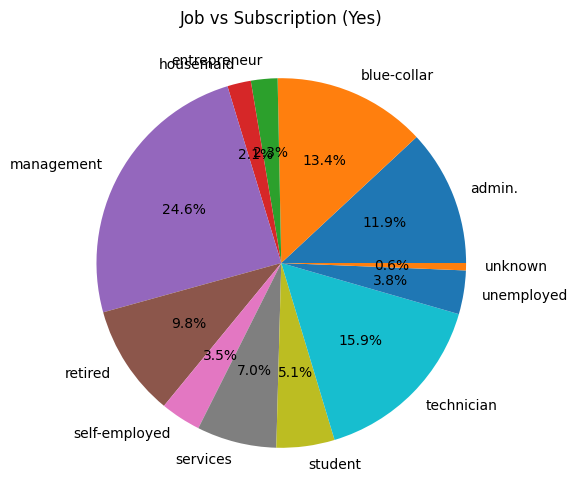

In [15]:
# Pie chart for job vs subscription
job_subscription = bank_full.groupby(['job', 'y']).size().unstack().fillna(0)
job_subscription.plot(kind='pie', y='yes', autopct='%1.1f%%', legend=False, figsize=(8, 6), title="Job vs Subscription (Yes)")
plt.ylabel('')
plt.show()


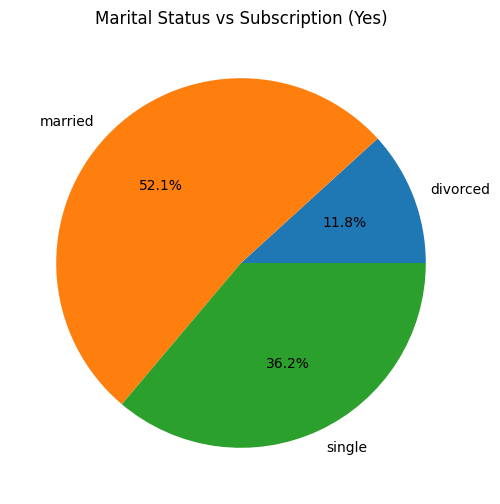

In [16]:
# Pie chart for marital vs subscription
marital_subscription = bank_full.groupby(['marital', 'y']).size().unstack().fillna(0)
marital_subscription.plot(kind='pie', y='yes', autopct='%1.1f%%', legend=False, figsize=(8, 6), title="Marital Status vs Subscription (Yes)")
plt.ylabel('')
plt.show()


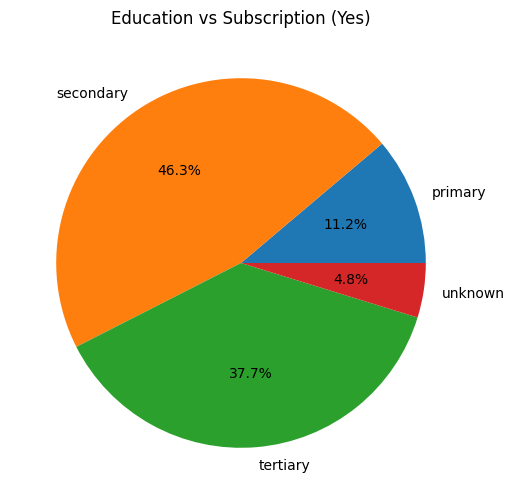

In [17]:
# Pie chart for education vs subscription
education_subscription = bank_full.groupby(['education', 'y']).size().unstack().fillna(0)
education_subscription.plot(kind='pie', y='yes', autopct='%1.1f%%', legend=False, figsize=(8, 6), title="Education vs Subscription (Yes)")
plt.ylabel('')
plt.show()


**2. How does prior engagement with the bank (e.g., previous campaigns or contact history) impact a client’s decision to subscribe?**

*Bar Plot for Average Engagement Metrics*

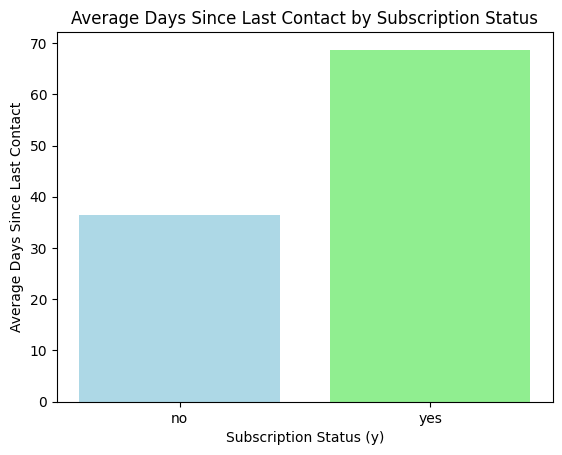

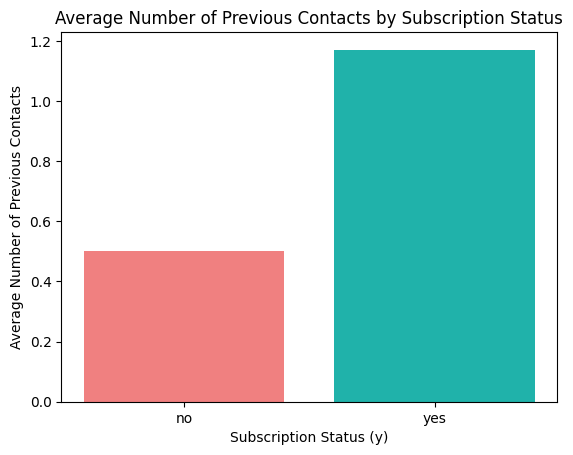

In [18]:
# Average days since last contact grouped by subscription status
pdays_mean = bank_full.groupby('y')['pdays'].mean()

plt.bar(pdays_mean.index, pdays_mean, color=['lightblue', 'lightgreen'])
plt.title("Average Days Since Last Contact by Subscription Status")
plt.ylabel("Average Days Since Last Contact")
plt.xlabel("Subscription Status (y)")
plt.show()

# Average number of previous contacts grouped by subscription status
previous_mean = bank_full.groupby('y')['previous'].mean()

plt.bar(previous_mean.index, previous_mean, color=['lightcoral', 'lightseagreen'])
plt.title("Average Number of Previous Contacts by Subscription Status")
plt.ylabel("Average Number of Previous Contacts")
plt.xlabel("Subscription Status (y)")
plt.show()


*Violin Plot for Detailed Distributions*

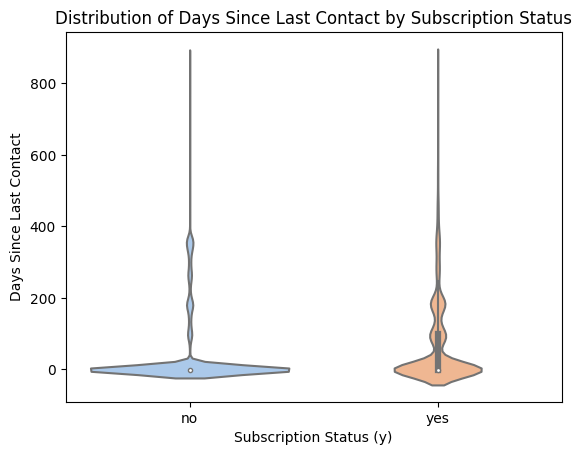

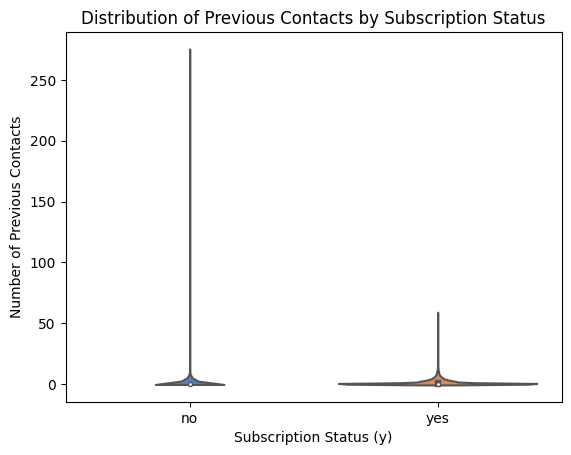

In [19]:
# import seaborn as sns

# Violin plot for days since last contact
sns.violinplot(x='y', y='pdays', data=bank_full, palette="pastel", split=True)
plt.title("Distribution of Days Since Last Contact by Subscription Status")
plt.ylabel("Days Since Last Contact")
plt.xlabel("Subscription Status (y)")
plt.show()

# Violin plot for number of previous contacts
sns.violinplot(x='y', y='previous', data=bank_full, palette="muted", split=True)
plt.title("Distribution of Previous Contacts by Subscription Status")
plt.ylabel("Number of Previous Contacts")
plt.xlabel("Subscription Status (y)")
plt.show()


**3. What is the effect of financial indicators (e.g., balance, loan status, housing loan status) on subscription likelihood?**

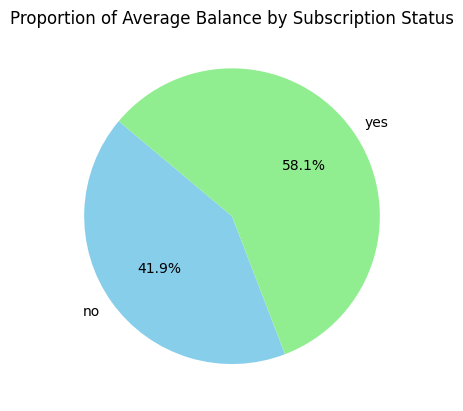

In [20]:
# Calculate the mean balance for each subscription status
balance_mean = bank_full.groupby('y')['balance'].mean()

# Pie chart
plt.pie(balance_mean, labels=balance_mean.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title("Proportion of Average Balance by Subscription Status")
plt.show()


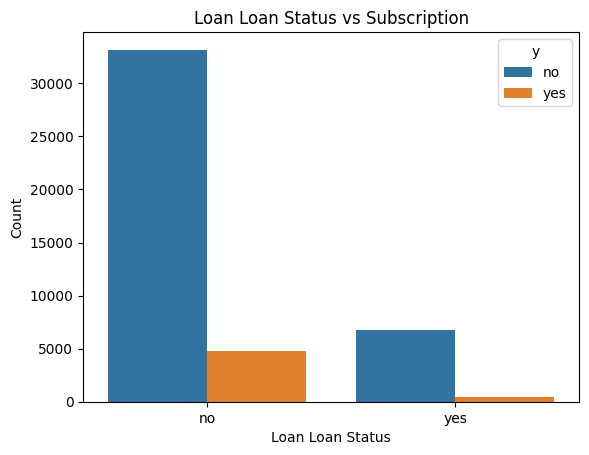

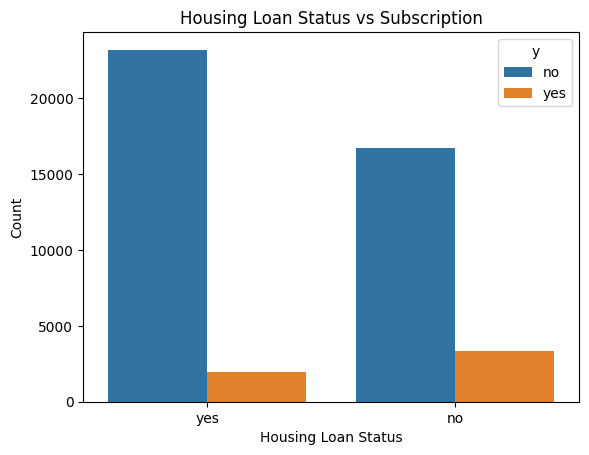

In [21]:
financial_columns = ['loan', 'housing']

for column in financial_columns:
    sns.countplot(x=column, hue='y', data=bank_full)
    plt.title(f"{column.capitalize()} Loan Status vs Subscription")
    plt.ylabel("Count")
    plt.xlabel(f"{column.capitalize()} Loan Status")
    plt.show()


**4. Are there specific time-related patterns (e.g., month or day of contact) that correlate with successful subscriptions?**

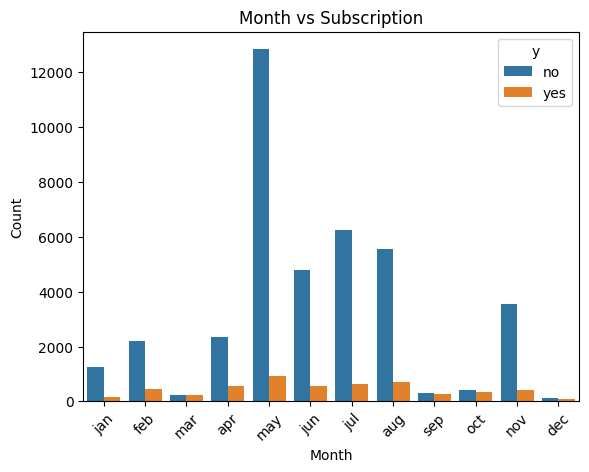

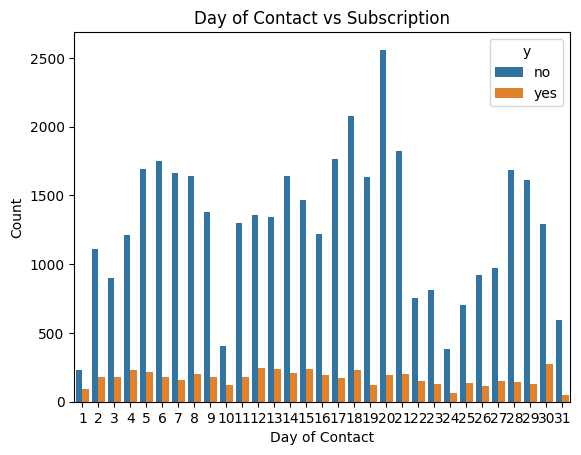

In [22]:
sns.countplot(x='month', hue='y', data=bank_full, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title("Month vs Subscription")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='day', hue='y', data=bank_full)
plt.title("Day of Contact vs Subscription")
plt.ylabel("Count")
plt.xlabel("Day of Contact")
plt.show()


**5. Can the model help identify high-value clients, enabling the marketing team to prioritize resources effectively?**

*Combination of Key Factors (Balance and Age)*

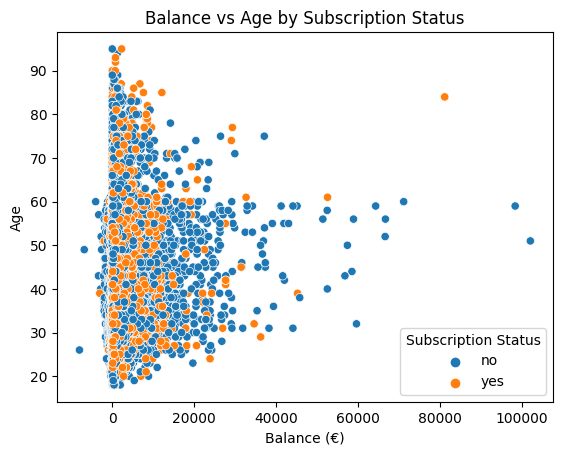

In [23]:
sns.scatterplot(x='balance', y='age', hue='y', data=bank_full)
plt.title("Balance vs Age by Subscription Status")
plt.xlabel("Balance (€)")
plt.ylabel("Age")
plt.legend(title="Subscription Status")
plt.show()


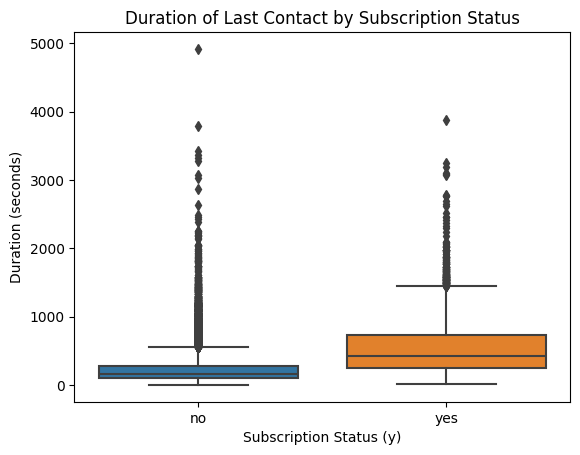

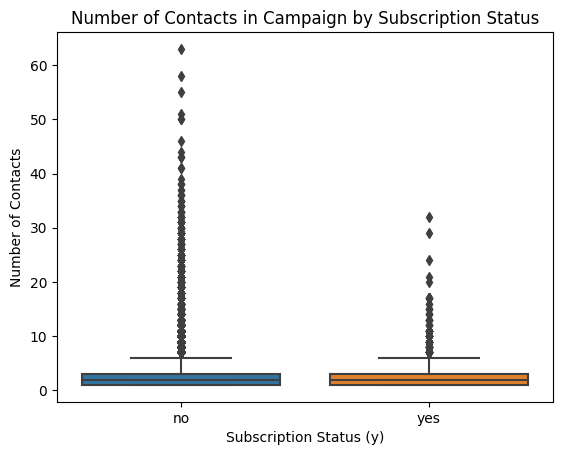

In [24]:
sns.boxplot(x='y', y='duration', data=bank_full)
plt.title("Duration of Last Contact by Subscription Status")
plt.ylabel("Duration (seconds)")
plt.xlabel("Subscription Status (y)")
plt.show()

sns.boxplot(x='y', y='campaign', data=bank_full)
plt.title("Number of Contacts in Campaign by Subscription Status")
plt.ylabel("Number of Contacts")
plt.xlabel("Subscription Status (y)")
plt.show()


## **5.0: Testing Hypothesis** ##

**Null Hypothesis (H₀):**

*There is no statistically significant relationship between the features provided (e.g., demographic, financial, and campaign-specific attributes) and the likelihood of a client subscribing to a term deposit.*

**Alternate Hypothesis (H₁):**

*There is a statistically significant relationship between the features provided (e.g., demographic, financial, and campaign-specific attributes) and the likelihood of a client subscribing to a term deposit.*

**Feature Importance (Statistical Tests);**

*a. Chi-Square Test (Categorical Variables)*

*Objective: Evaluate whether there is a significant relationship between categorical features and the target variable y.*

In [25]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in categorical_columns:
    contingency_table = pd.crosstab(bank_full[column], bank_full['y'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{column}: p-value = {p}")
    if p < 0.05:
        print(f"  Significant relationship with y (reject H₀)")
    else:
        print(f"  No significant relationship with y (fail to reject H₀)")


job: p-value = 3.337121944935502e-172
  Significant relationship with y (reject H₀)
marital: p-value = 2.1450999986791792e-43
  Significant relationship with y (reject H₀)
education: p-value = 1.6266562124072994e-51
  Significant relationship with y (reject H₀)
default: p-value = 2.4538606753508344e-06
  Significant relationship with y (reject H₀)
housing: p-value = 2.918797605076633e-192
  Significant relationship with y (reject H₀)
loan: p-value = 1.665061163492756e-47
  Significant relationship with y (reject H₀)
contact: p-value = 1.251738325340638e-225
  Significant relationship with y (reject H₀)
month: p-value = 0.0
  Significant relationship with y (reject H₀)
poutcome: p-value = 0.0
  Significant relationship with y (reject H₀)


*b. ANOVA (Numerical Variables)*

*Objective: Test whether the mean of numerical features differs significantly between the yes and no groups of y.*

In [26]:
from scipy.stats import f_oneway

numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    group_yes = bank_full[bank_full['y'] == 'yes'][column]
    group_no = bank_full[bank_full['y'] == 'no'][column]
    stat, p = f_oneway(group_yes, group_no)
    print(f"{column}: p-value = {p}")
    if p < 0.05:
        print(f"  Significant difference (reject H₀)")
    else:
        print(f"  No significant difference (fail to reject H₀)")


age: p-value = 8.825643691900577e-08
  Significant difference (reject H₀)
balance: p-value = 2.5211136918594683e-29
  Significant difference (reject H₀)
duration: p-value = 0.0
  Significant difference (reject H₀)
campaign: p-value = 1.0123473642068786e-54
  Significant difference (reject H₀)
pdays: p-value = 3.79055331945749e-108
  Significant difference (reject H₀)
previous: p-value = 7.801830349772385e-88
  Significant difference (reject H₀)


## **DATA PREPARATION** ##

*Data Cleaning- removing duplicates, handling missing values*

In [27]:
# checking for null values in the data
bank_full.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## **Observation** ##

*'duration':*

*Highly correlated with y but causes data leakage. Exclude it during training.*

*The variable pdays represents the number of days since a client was last contacted during a previous campaign.*

*When pdays = -1, it means the client was not contacted before. This is important because it tells us whether a client is new to the bank's campaigns or has been engaged before.*

*To understand the impact of prior contact on subscription likelihood, we need to analyze pdays in two parts:*

*Clients with pdays = -1 (not contacted before).*

*Clients with pdays > -1 (contacted before)*

In [28]:
bank_full.drop(columns=['duration'], inplace=True)

In [29]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [30]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


**Split data into input(X) and target(y) features**

In [31]:
# Define X and y
X = bank_full.drop('y', axis=1)  # Features: all columns except the target
y = bank_full['y']              # Target: the 'y' column


In [32]:
print(X.head())
print(y.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  campaign  pdays  previous poutcome  
0  unknown    5   may         1     -1         0  unknown  
1  unknown    5   may         1     -1         0  unknown  
2  unknown    5   may         1     -1         0  unknown  
3  unknown    5   may         1     -1         0  unknown  
4  unknown    5   may         1     -1         0  unknown  
0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object


## Feature Engineering

The variable pdays represents the number of days since a client was last contacted during a previous campaign.

When pdays = -1, it means the client was not contacted before. This is important because it tells us whether a client is new to the bank's campaigns or has been engaged before.
To understand the impact of prior contact on subscription likelihood, we need to analyze pdays in two parts:
Clients with pdays = -1 (not contacted before).
Clients with pdays > -1 (contacted before)

By separating these groups, we can see if prior engagement with the client makes a difference in their decision to subscribe to a term deposit. For example, it might reveal that clients who have been contacted in the past are more likely to subscribe

Handling pdays;

Create a New Feature: was_contacted_before

Convert pdays into a binary indicator (1 for contacted before, 0 for not contacted) to capture the essence of whether a client was previously contacted.

Retain Non-Negative pdays Values for Those Contacted

Replace pdays = -1 with 0 or NaN to avoid skewing the data distribution during numerical transformations

In [33]:
# Convert pdays into a binary indicator (1 for contacted before, 0 for not contacted)
X['was_contacted_before'] = (X['pdays'] != -1).astype(int)

In [34]:
# Replace pdays = -1 with 0 or NaN to avoid skewing the data distribution during numerical transformations
X['pdays'] = X['pdays'].apply(lambda x: 0 if x == -1 else x)


In [35]:
# Verify changes
print(X[['pdays', 'was_contacted_before']].head())


   pdays  was_contacted_before
0      0                     0
1      0                     0
2      0                     0
3      0                     0
4      0                     0


In [36]:
# selecting the numeric columns
numeric_cols = X.select_dtypes(include='number').columns

numeric_cols

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'was_contacted_before'],
      dtype='object')

In [37]:
# selecting the categorical columns
categorical_cols = X.select_dtypes(include='object').columns

categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

**Splitting data into training and evaluation**

In [38]:
# using train test split to split the data with test size of 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

## Data Encoding

*Normalization & Scaling*

#### 4.1 Creating a Pipeline to preprocess the data

In [39]:
# Numeric columns (including 'pdays' and 'was_contacted_before')
numeric_cols = X_train.select_dtypes(include='number').columns

# Categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Define the pipeline for numerical features
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', RobustScaler())                       # Use RobustScaler to handle outliers
])

# Define the pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))        # One-hot encode categorical variables
])

# Combine pipelines into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformations', numeric_pipeline, numeric_cols),
    ('categorical_transformations', categorical_pipeline, categorical_cols)
])

# Confirm the setup of the preprocessor
print(preprocessor)


ColumnTransformer(transformers=[('numerical_transformations',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'was_contacted_before'],
      dtype='object')),
                                ('categorical_transformations',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])


#### 4.2 Label/Target Encoding

In [40]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target and transform both train and test targets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify the encoding
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train_encoded[:5])
print("Encoded y_test:", y_test_encoded[:5])


Classes: ['no' 'yes']
Encoded y_train: [0 1 1 0 0]
Encoded y_test: [0 0 0 0 0]


## 5.0 Modeling

#### 5.1 ML Pipeline(Unbalanced Data)

In [ ]:
# List of models to train
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Define metrics dataframe
unbalanced_metrics = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through models
for model_name, classifier in models:
    # Create a pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Calculate classification metrics
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract key metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append results to metrics dataframe
    unbalanced_metrics.loc[len(unbalanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

# Display metrics
print(unbalanced_metrics)


          Model Name  Accuracy  Precision    Recall  F1 Score
0      Decision Tree  0.833131   0.838838  0.833131  0.835906
1                SVC  0.882451   0.828951  0.882451  0.830370
2      Random Forest  0.892071   0.869940  0.892071  0.869445
3        Naive Bayes  0.837001   0.859222  0.837001  0.846742
4  Gradient Boosting  0.894283   0.874409  0.894283  0.868309


## 6.0 Evaluation 

#### 6.1 Train and compare data(Random Oversampler)

In [42]:
# Oversampling to balance the dataset
sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

# Initialize a dataframe to store the evaluation metrics
balanced_metrics = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through the models for evaluation
for model_name, classifier in models:
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])

    # Train the pipeline with the oversampled dataset
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing dataset
    y_pred_resampled = pipeline.predict(X_test)
    
    # Calculate classification metrics
    metrics = classification_report(y_test_encoded, y_pred_resampled, output_dict=True)
    
    # Extract key metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']
    
    # Append the results to the balanced_metrics dataframe
    balanced_metrics.loc[len(balanced_metrics)] = [model_name, accuracy, precision, recall, f1_score]

# Display the results
print(balanced_metrics)


          Model Name  Accuracy  Precision    Recall  F1 Score
0      Decision Tree  0.833905   0.836470  0.833905  0.835172
1                SVC  0.825943   0.871742  0.825943  0.843690
2      Random Forest  0.886984   0.869210  0.886984  0.874591
3        Naive Bayes  0.805485   0.859005  0.805485  0.826632
4  Gradient Boosting  0.802389   0.873223  0.802389  0.827968


#### 6.2 Train and balance dataset on SMote

In [43]:
from imblearn.pipeline import Pipeline as ImbPipeline


# Dictionary to store trained pipelines
all_pipeline = {}

# DataFrame to store the evaluation metrics
smote_df = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through the models for training and evaluation with SMOTE
for model_name, classifier in models:
    # Define the pipeline with SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocessing steps (numeric + categorical)
        ('smote', SMOTE(random_state=42)),  # SMOTE for balancing the data
        ('classifier', classifier),  # Model training
    ])
    
    # Train the pipeline on the training dataset
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on the testing dataset
    smote_y_pred = pipeline.predict(X_test)
    
    # Save the trained pipeline for the model
    all_pipeline[model_name] = pipeline
    
    # Calculate classification metrics
    smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)
    
    # Extract metrics
    accuracy = smote_dict['accuracy']
    precision = smote_dict['weighted avg']['precision']
    recall = smote_dict['weighted avg']['recall']
    f1_score = smote_dict['weighted avg']['f1-score']
    
    # Append metrics to the smote_df DataFrame
    smote_df.loc[len(smote_df)] = [model_name, accuracy, precision, recall, f1_score]

# Display the evaluation metrics
print(smote_df)


          Model Name  Accuracy  Precision    Recall  F1 Score
0      Decision Tree  0.821741   0.839643  0.821741  0.830019
1                SVC  0.786575   0.849934  0.786575  0.811696
2      Random Forest  0.886210   0.866686  0.886210  0.872201
3        Naive Bayes  0.757713   0.856974  0.757713  0.793526
4  Gradient Boosting  0.878138   0.868076  0.878138  0.872405


In [44]:
# all_pipeline ={}
# smote_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])
# for model_name,classifier in models:
#     pipeline=imbpipeline(steps=[
#         ('preprocessor',preprocessor),
#         ('smote',SMOTE(random_state=42)),
#         ('classifier',classifier),
#     ])

#     pipeline.fit(X_train,y_train_encoded)
    
#     # predicting on the testing dataset
#     smote_y_pred = pipeline.predict(X_test)
#     all_pipeline[model_name] = pipeline
#     smote_dict = classification_report(y_test_encoded,smote_y_pred,output_dict=True)
   
#     accuracy = smote_dict['accuracy']
#     precision = smote_dict['weighted avg']['precision']
#     recall = smote_dict['weighted avg']['recall']
#     f1_score = smote_dict['weighted avg']['f1-score']
#     smote_df.loc[len(smote_df)]=[model_name,accuracy,recall,precision,f1_score]

# smote_df

#### 6.3 Train Data on Feature Importance and Selection

In [45]:
# # using kbest to select the best features
# selection = SelectKBest(mutual_info_classif,k=10)

# fi_smote_df = pd.DataFrame(columns=['Model_name','Accuracy','Precision','Recall','F1_score'])

# all_pipeline ={}
# for model_name,classifier in models:
#     pipeline=imbpipeline(steps=[
#         ('preprocessor',preprocessor),
#         ('smote',SMOTE(random_state=42)),
#         ('feature_selection',selection),
#         ('classifier',classifier),
        
#     ])

#     pipeline.fit(X_train,y_train_encoded)

#     fi_y_pred = pipeline.predict(X_test)

#     all_pipeline[model_name] = pipeline
    
#     fi_smote_dict = classification_report(y_test_encoded,fi_y_pred,output_dict=True)
   
#     accuracy = fi_smote_dict['accuracy']
#     precision = fi_smote_dict['weighted avg']['precision']
#     recall = fi_smote_dict['weighted avg']['recall']
#     f1_score = fi_smote_dict['weighted avg']['f1-score']
#     fi_smote_df.loc[len(fi_smote_df)]=[model_name,accuracy,recall,precision,f1_score]

# fi_smote_df 

#### 6.4 Visualize ROC Curve

In [46]:
# # Plot ROC curve
# fig,ax = plt.subplots(figsize=(8,8))
# roc_auc_curve_data = {}
# for model_name,classifier in models:
#     pipeline=imbpipeline(steps=[
#         ('preprocessor',preprocessor),
#         ('smote',SMOTE(random_state=42)),
#         ('feature_selection',selection),
#         ('classifier',classifier),
        
#     ])
#     # fitting our pipeline with train data
#     pipeline.fit(X_train,y_train_encoded)

#     y_score = pipeline.predict_proba(X_test)[:,1]
#     fpr,tpr,threshold= roc_curve(y_test_encoded,y_score)
#     roc_auc = auc(fpr,tpr)

#     roc_auc_curve_df = pd.DataFrame({'false positive rate':fpr,'True positive rate':tpr,'Threshold':threshold})
#     roc_auc_curve_data[model_name] = roc_auc_curve_df

#     ax.plot(fpr,tpr,label =f'{model_name}(AUC={roc_auc:.2f})')
#     ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristics ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

<!-- - From the curve we can see that gradient boosting classifier covered the most area with an auc of 0.85, it is the best performing model so far -->

### 6.5 Confusion matrix

In [47]:
# # using the best performing pipelime to predict on the data
# gradient_pipeline = all_pipeline['Gradient Boosting']

# grad_y_pred =gradient_pipeline.predict(X_test)
# matrix = confusion_matrix(y_test_encoded, grad_y_pred)
# matrix

In [48]:
# # using the best performing pipelime to predict on the data
# random_pipeline = all_pipeline['Random Forest']

# ran_y_pred =random_pipeline.predict(X_test)
# matrix = confusion_matrix(y_test_encoded, ran_y_pred)
# matrix

In [49]:
# naives_pipeline =all_pipeline['Naives_Bay']

# naives_y_pred =naives_pipeline.predict(X_test)
# nav_matrix = confusion_matrix(y_test_encoded, naives_y_pred)
# nav_matrix

In [50]:
# # printing the confusion matrix
# sns.heatmap(data=matrix,annot=True,fmt='d',cmap='coolwarm')

### Setting threshold

In [51]:
# # checking the fpr,tpr and threshold 
# roc_auc_curve_data

In [52]:
# # setting threshold and using the threshold to predict on X_test
# threshold = 0.11
# y_pred_proba = gradient_pipeline.predict_proba(X_test)[:, 1]
# binary_prediction = (y_pred_proba > threshold)
# threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction)

In [53]:
# # printing confusion matrix after setting the threshold
# sns.heatmap(data=threshold_matrix,annot=True,fmt='d',cmap='coolwarm')

#### 6.5 Hyperparameter Tuning

*Create a dictionary of tuning parameters (hyperparameters)*

In [54]:
# # setting the parameters (gradient pipeline)
# params_grid = {
#     'feature_selection__k': [5, 10, 15],  
#     'classifier__n_estimators': [5, 10, 15],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
# }

# searcher1 = GridSearchCV(
#     gradient_pipeline, 
#     param_grid=params_grid, 
#     cv=5, scoring='f1'
#     )
# # fitting the searcher with train data
# searcher1.fit(X_train, y_train_encoded)

In [55]:
# # Perform hyper paramter tuning on the naives bay model
# params_grid = {
#     'classifier__priors': [None],  # Add appropriate values if needed
#     'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
# }

# searcher_n = GridSearchCV(
#     naives_pipeline, 
#     param_grid=params_grid, 
#     cv=5, scoring='f1'
#     )
# # fitting the searcher with train data
# searcher_n.fit(X_train, y_train_encoded)

In [56]:
# # setting the parameters with the random forest pipeline
# params_grid = {
#     'feature_selection__k': [5, 10, 15],  
#     'classifier__n_estimators': [5, 10, 15],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
# }

# searcher2 = GridSearchCV(
#     random_pipeline, 
#     param_grid=params_grid, 
#     cv=5, scoring='f1'
#     )
# # fitting the searcher with train data
# searcher2.fit(X_train, y_train_encoded)

In [57]:
# # checking the results of the tuned data in a dataframe
# search_history = pd.DataFrame(searcher.cv_results_)

In [58]:
#search_history

In [59]:
# # checking the best parameter used for gradient pipeline
# best = searcher1.best_params_
# best

In [60]:
# # checking the best parameter used for naives  bay
# best_params = searcher_n.best_params_
# best_params

In [61]:
# # checking the best parameter used for random
# best_parameters = searcher2.best_params_
# best_parameters

##### 6.5.1 Retrain model with best parameter

In [62]:
# # random forest
# random_pipeline.set_params(**best_parameters)
# random_pipeline.fit(X_train,y_train_encoded)

In [63]:
# # gradient
# gradient_pipeline.set_params(**best)
# gradient_pipeline.fit(X_train,y_train_encoded)

In [64]:
# # retrain the model with the best parameters naives
# naives_pipeline.set_params(**best_params)
# naives_pipeline.fit(X_train,y_train_encoded)

#### 7.0 **Business Impact & Assessment** ##

Our team used machine learning to predict customer churn for a telecommunications company, and achieved an accuracy of 0.82 and a lift of 2.28 with our Gradient Boosting model. The key metrics and findings of our model are:

**Precision:**
*0.76*

**Recall:** 
*0.71*

**Specificity:** 
*0.87*

**F1 score:** 
*0.73*

**Gain:**
*0.71*

**The confusion matrix of our model on the testing set is:**

**Predicted Churn	Predicted Stay**

**Actual Churn**	*355 (TP)	144 (FN)*

**Actual Stay**	    *112 (FP)	789 (TN)*

Our model correctly identified 76% of the customers who churned, and captured 71% of the total churners in the testing set. This means that our model was more than twice as likely to find a churner than a random guess, and could help the company reduce the number of missed opportunities and revenue losses.

We recommend that the company use our model to identify the customers who are at risk of churn, and implement retention strategies based on the insights derived from the data analysis, such as offering discounts, benefits, or personalized services to these customers. 🙏

### 8.0 Testing on unknown dataset

In [65]:
# prediction = gradient_pipeline.predict(df_test)
# prediction=LabelEncoder.inverse_transform(prediction)

In [66]:
# pred = random_pipeline.predict(df_test)
# pred = LabelEncoder.inverse_transform(pred)

In [67]:
# df_test['churn'] = pred

In [68]:
# df_test['Churn']=prediction

In [69]:
# df_test

#### 9.0 Model Persistance

In [70]:
#import joblib

#os.makedirs('./models/')
#joblib.dump(gradient_pipeline,'./models/gradient_pipeline.joblib')
#joblib.dump(OneHotEncoder,'./models/encoder.joblib')
#joblib.dump(LabelEncoder,'./models/encoderl.joblib')
#joblib.dump(random_pipeline,'./models/random_pipeline.joblib')
#joblib.dump(naives_pipeline,'./models/naives_pipeline.joblib')

#### 10 Conclusions and Recommendations

In conclusion, the development and evaluation of the classification model using a gradient pipeline have yielded insightful results. The gradient pipeline, which incorporates feature selection, sampling techniques, and hyperparameter tuning, has contributed to the model's ability to capture complex patterns in the data. Through rigorous testing on an independent test set, we have assessed the model's performance using key classification metrics.

The evaluation metrics, including accuracy, precision, recall, F1 score, and area under the ROC curve, provide a comprehensive understanding of the model's strengths and limitations.